In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('2/Base.csv')

In [3]:
len(df)

1000000

In [4]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


In [6]:
(df['fraud_bool'].value_counts() / len(df))*100

fraud_bool
0    98.8971
1     1.1029
Name: count, dtype: float64

In [7]:
df.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
prev_address_months_count           0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_leng

In [8]:
df.dtypes

fraud_bool                            int64
income                              float64
name_email_similarity               float64
prev_address_months_count             int64
current_address_months_count          int64
customer_age                          int64
days_since_request                  float64
intended_balcon_amount              float64
payment_type                         object
zip_count_4w                          int64
velocity_6h                         float64
velocity_24h                        float64
velocity_4w                         float64
bank_branch_count_8w                  int64
date_of_birth_distinct_emails_4w      int64
employment_status                    object
credit_risk_score                     int64
email_is_free                         int64
housing_status                       object
phone_home_valid                      int64
phone_mobile_valid                    int64
bank_months_count                     int64
has_other_cards                 

In [9]:
numerical = [feature for feature in df.columns if df[feature].nunique() >= 10]

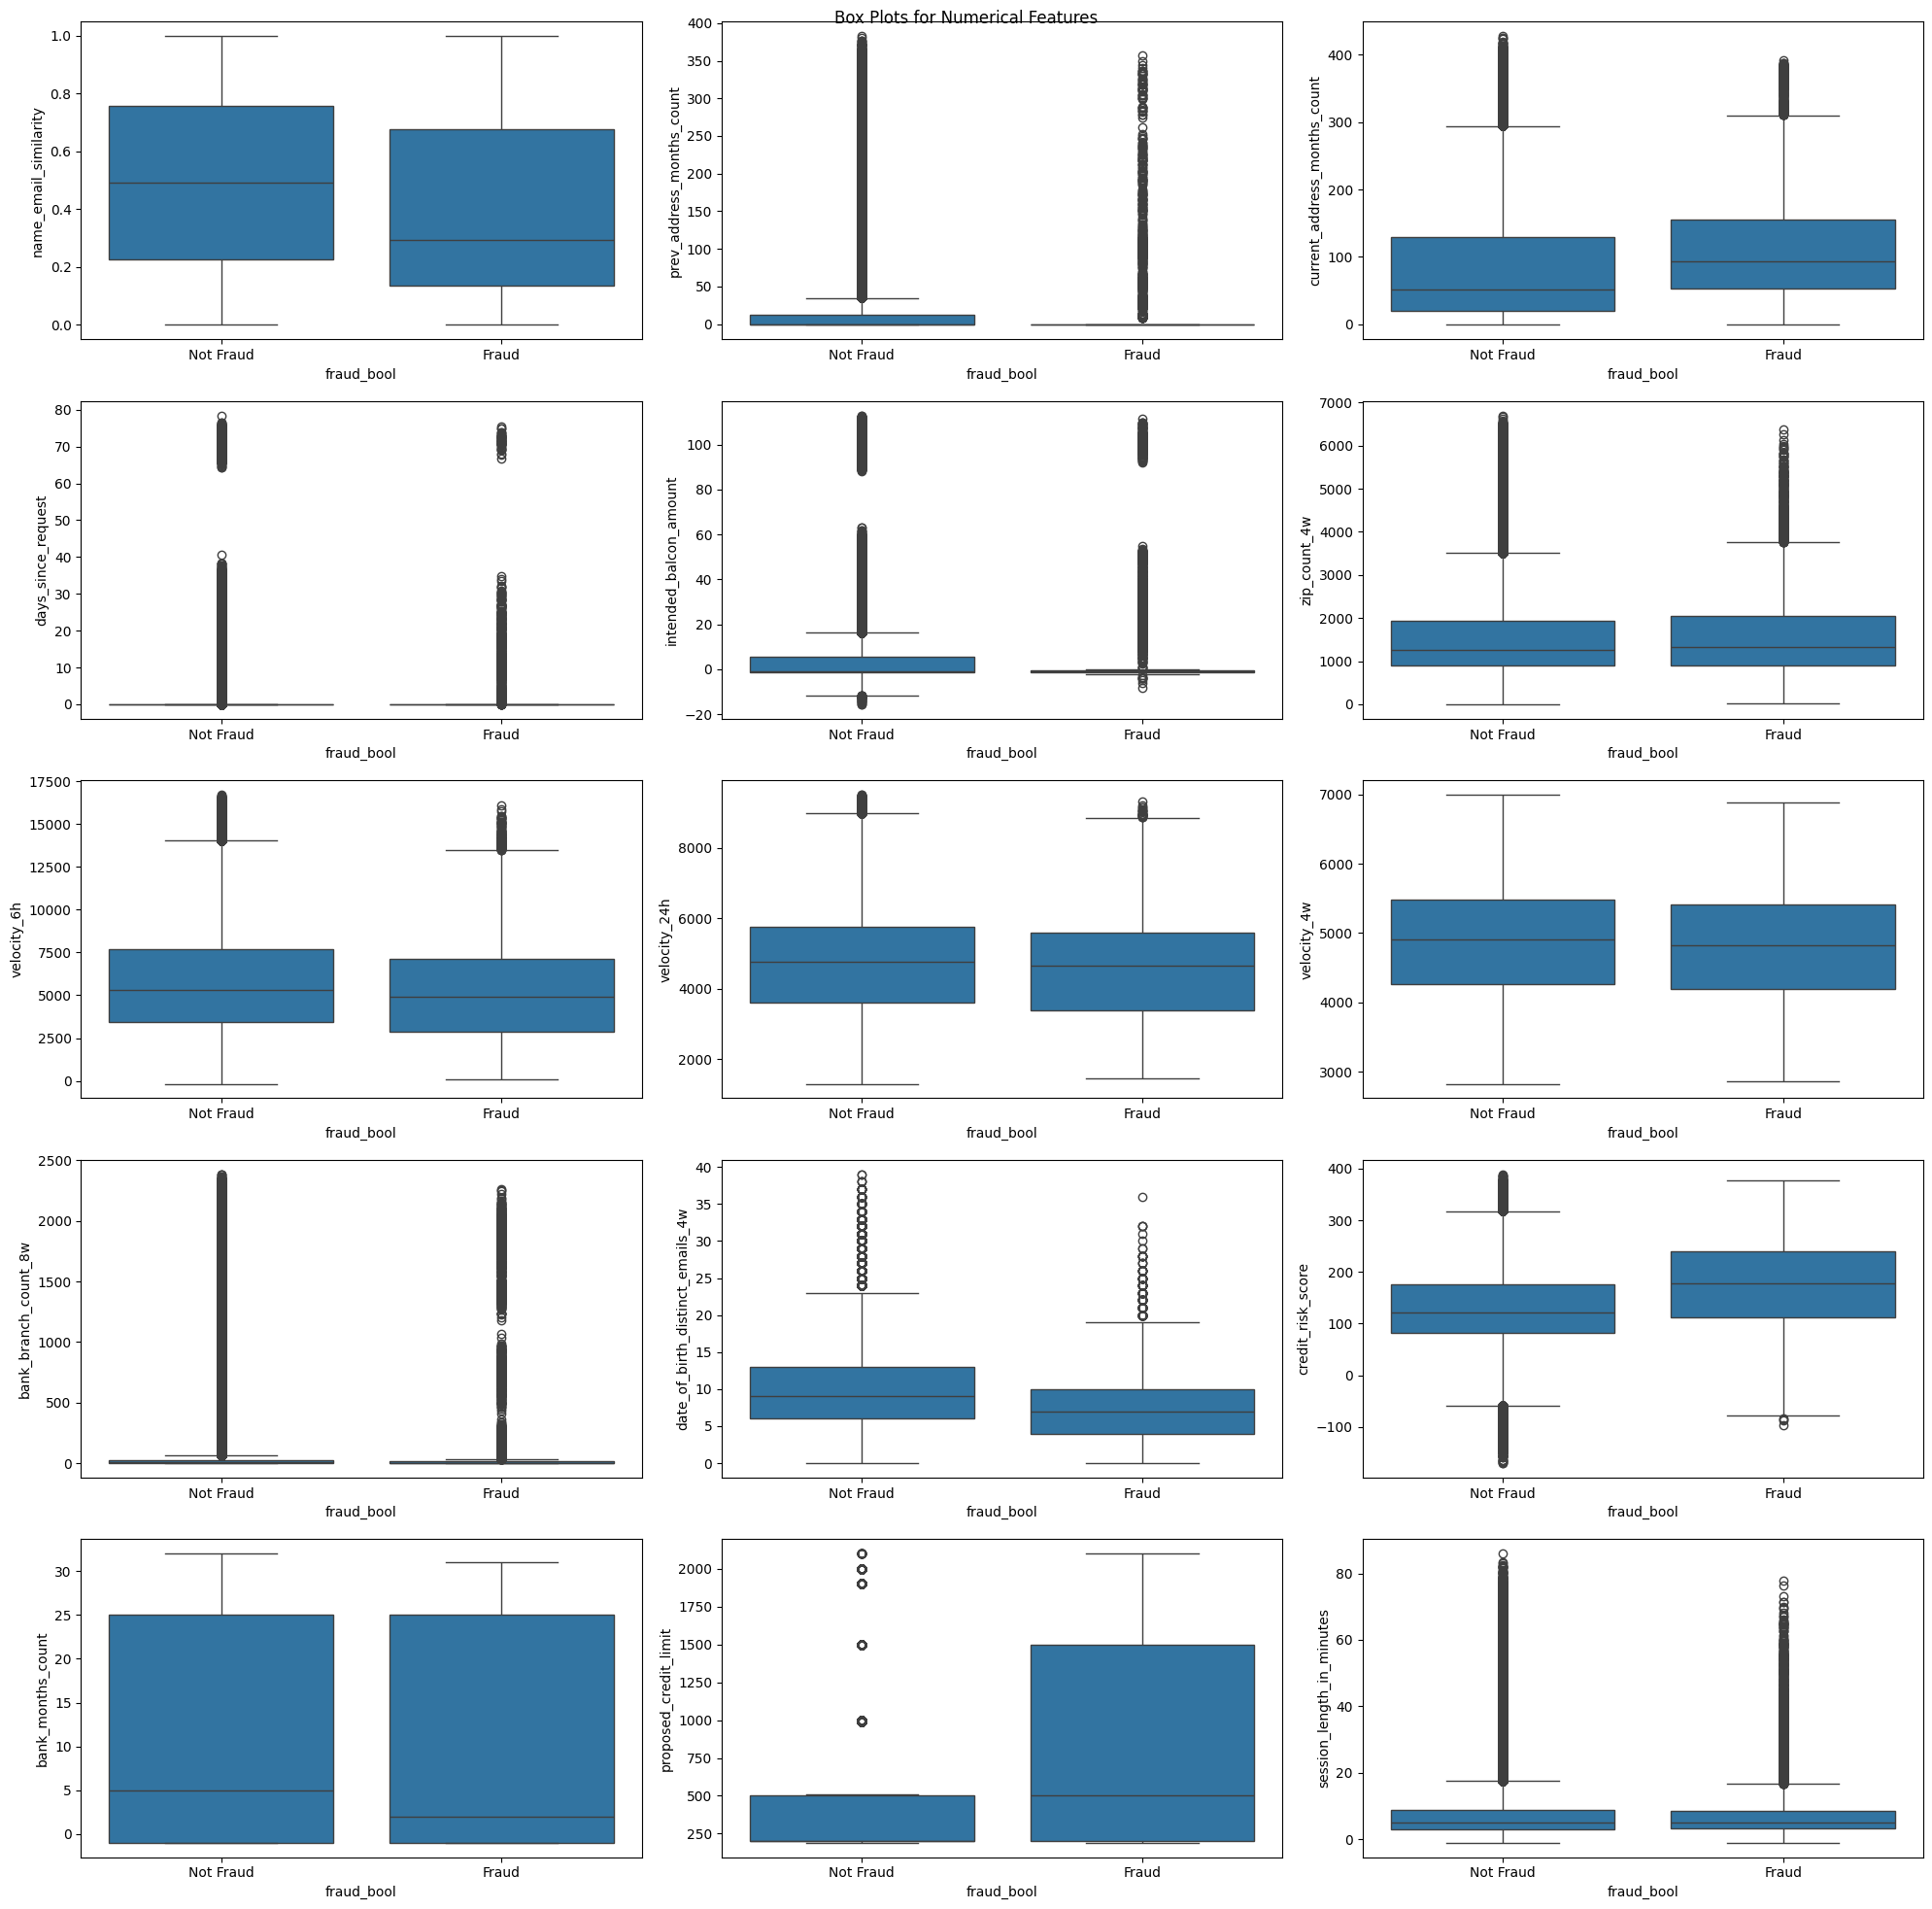

In [10]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
fig.suptitle("Box Plots for Numerical Features")
for i, feature in enumerate(numerical):
    ax = axes[i//3][i%3]
    sns.boxplot(data=df, x='fraud_bool', y=feature, ax=ax)
    ax.set_xlabel('fraud_bool')
    ax.set_xticks([0, 1])
    ax.set_ylabel(feature)
    ax.set_xticklabels(['Not Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

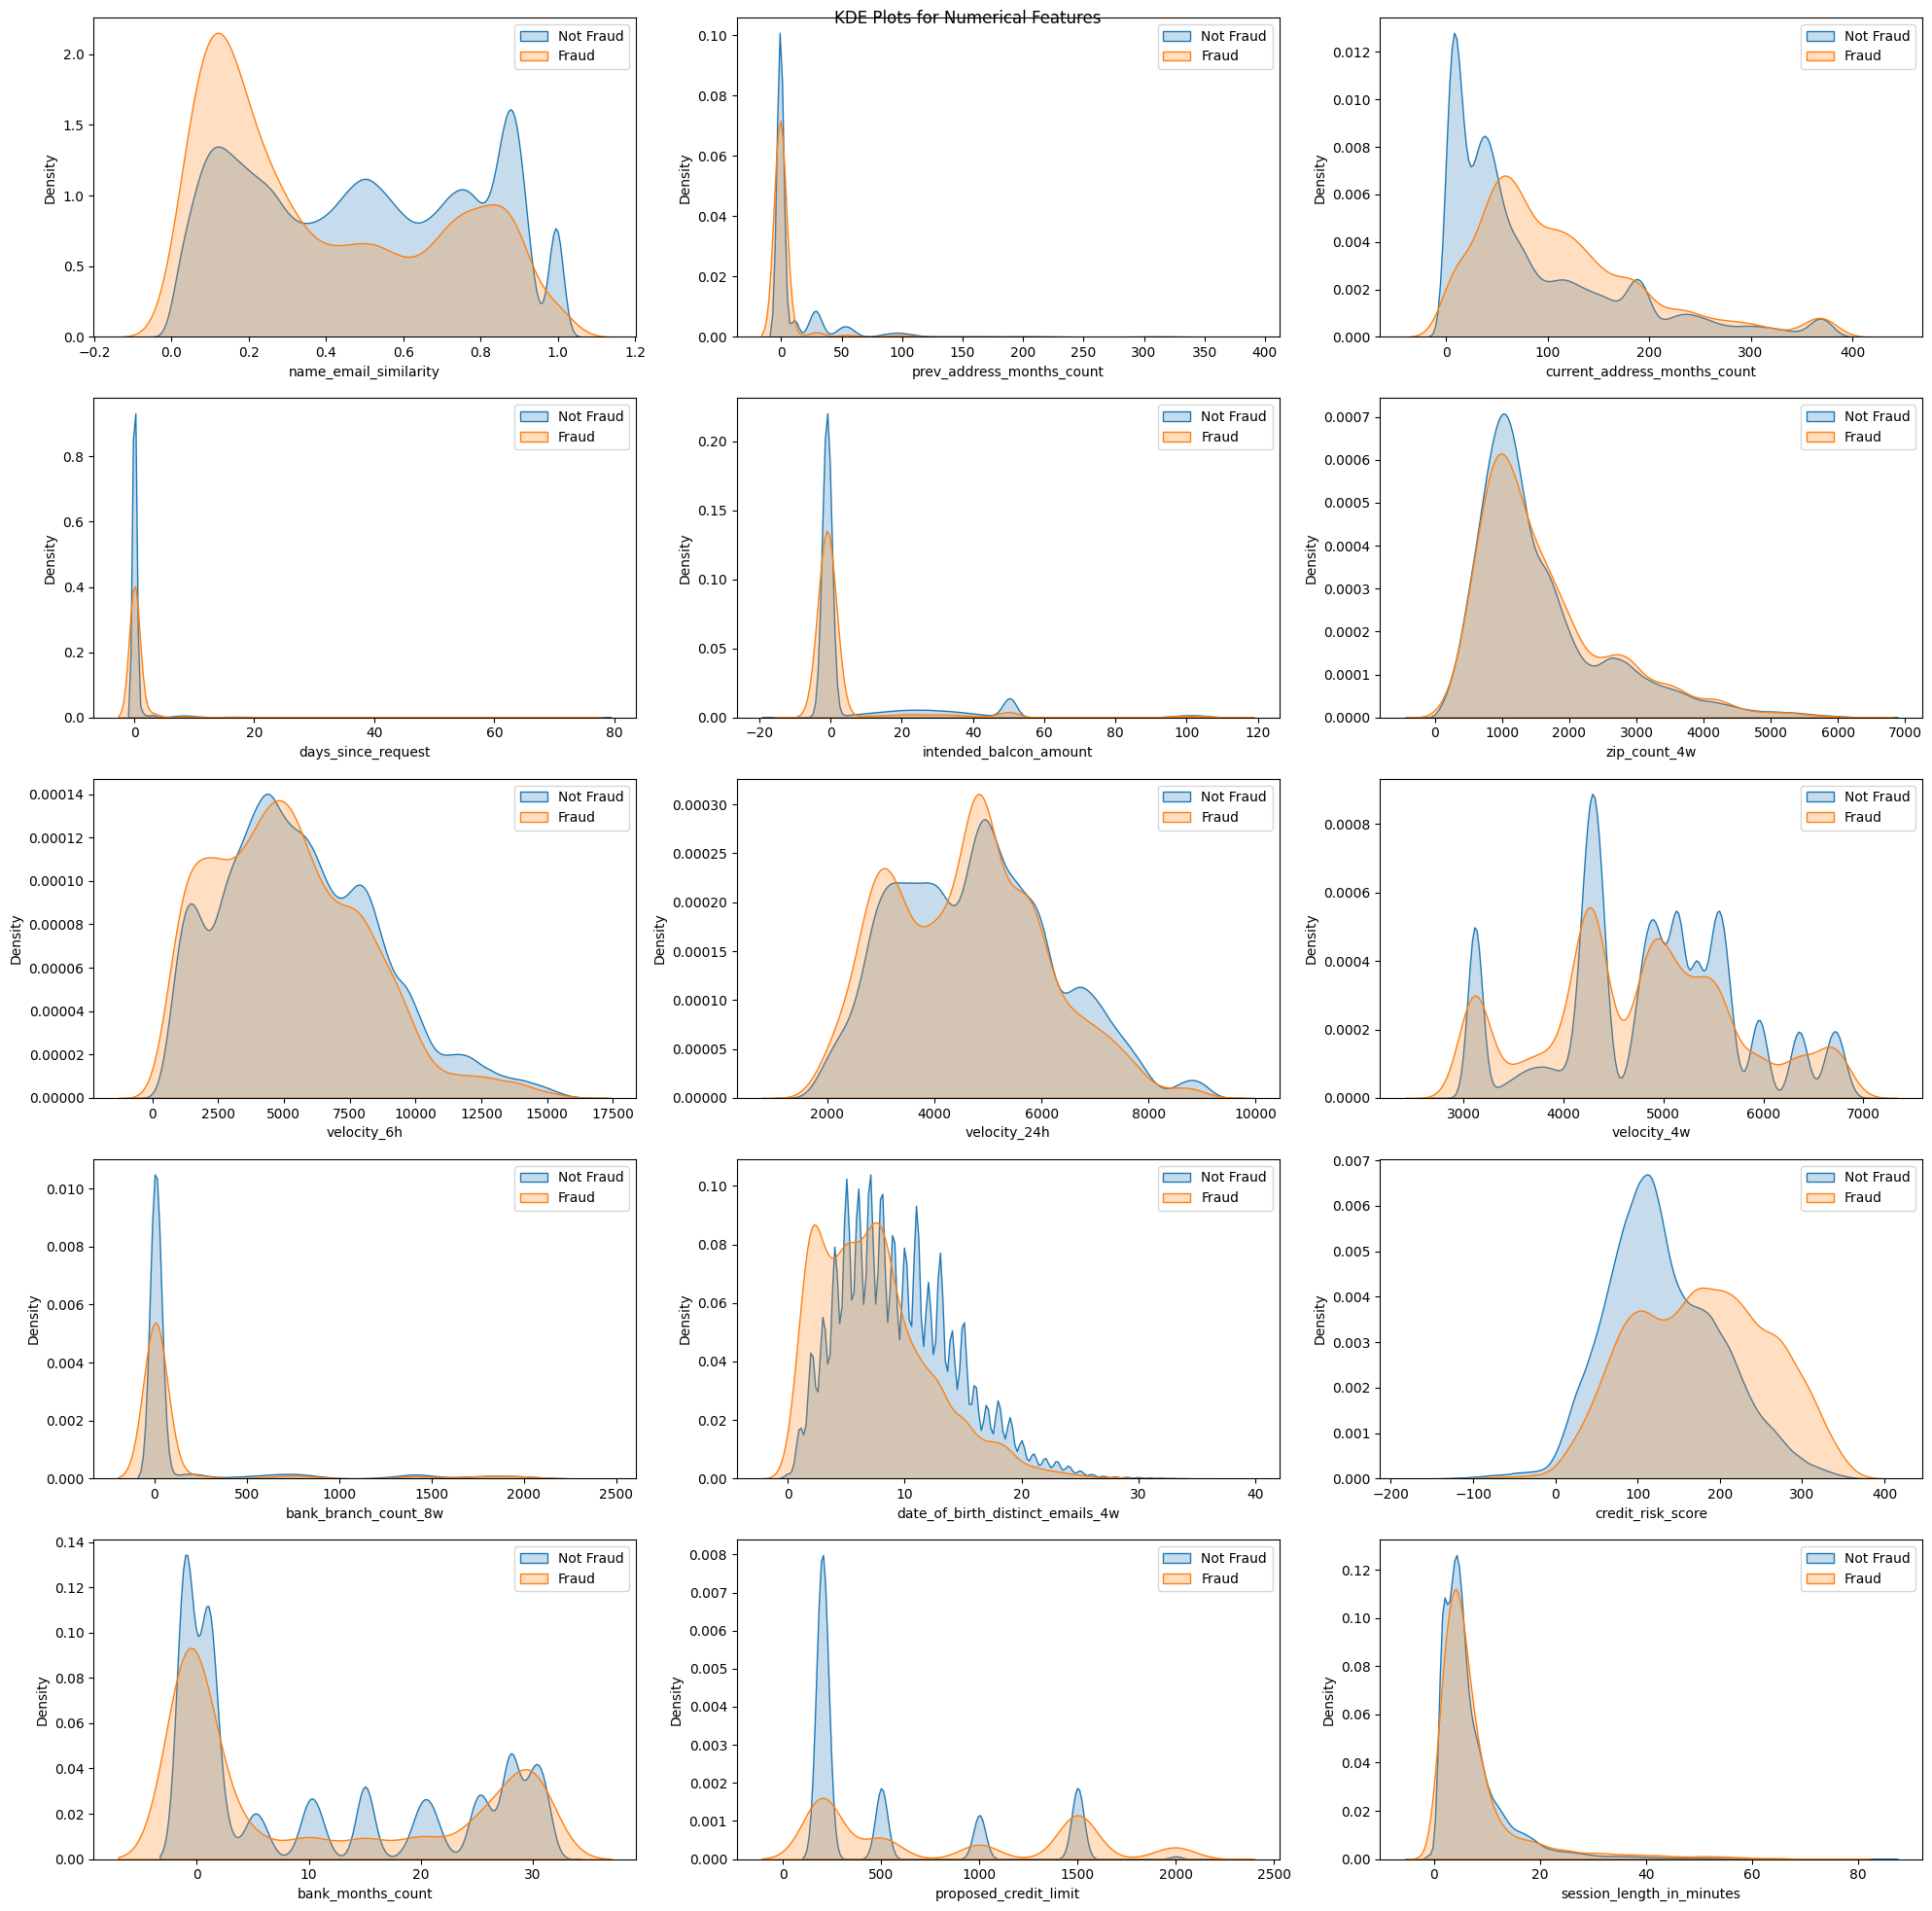

In [11]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(20, 20))
fig.suptitle("KDE Plots for Numerical Features")
for i, feature in enumerate(numerical):
    ax = axes[i//3][i%3]
    sns.kdeplot(data=df[df['fraud_bool'] == 0][feature], fill=True, ax=ax, label='Not Fraud')
    sns.kdeplot(data=df[df['fraud_bool'] == 1][feature], fill=True, ax=ax, label='Fraud')
    ax.set_xlabel(feature)
    ax.legend()
plt.tight_layout()
plt.show()

In [12]:
categorical = {feature for feature in df.columns if df[feature].dtype == "object"}

In [13]:
print(len(categorical))

5


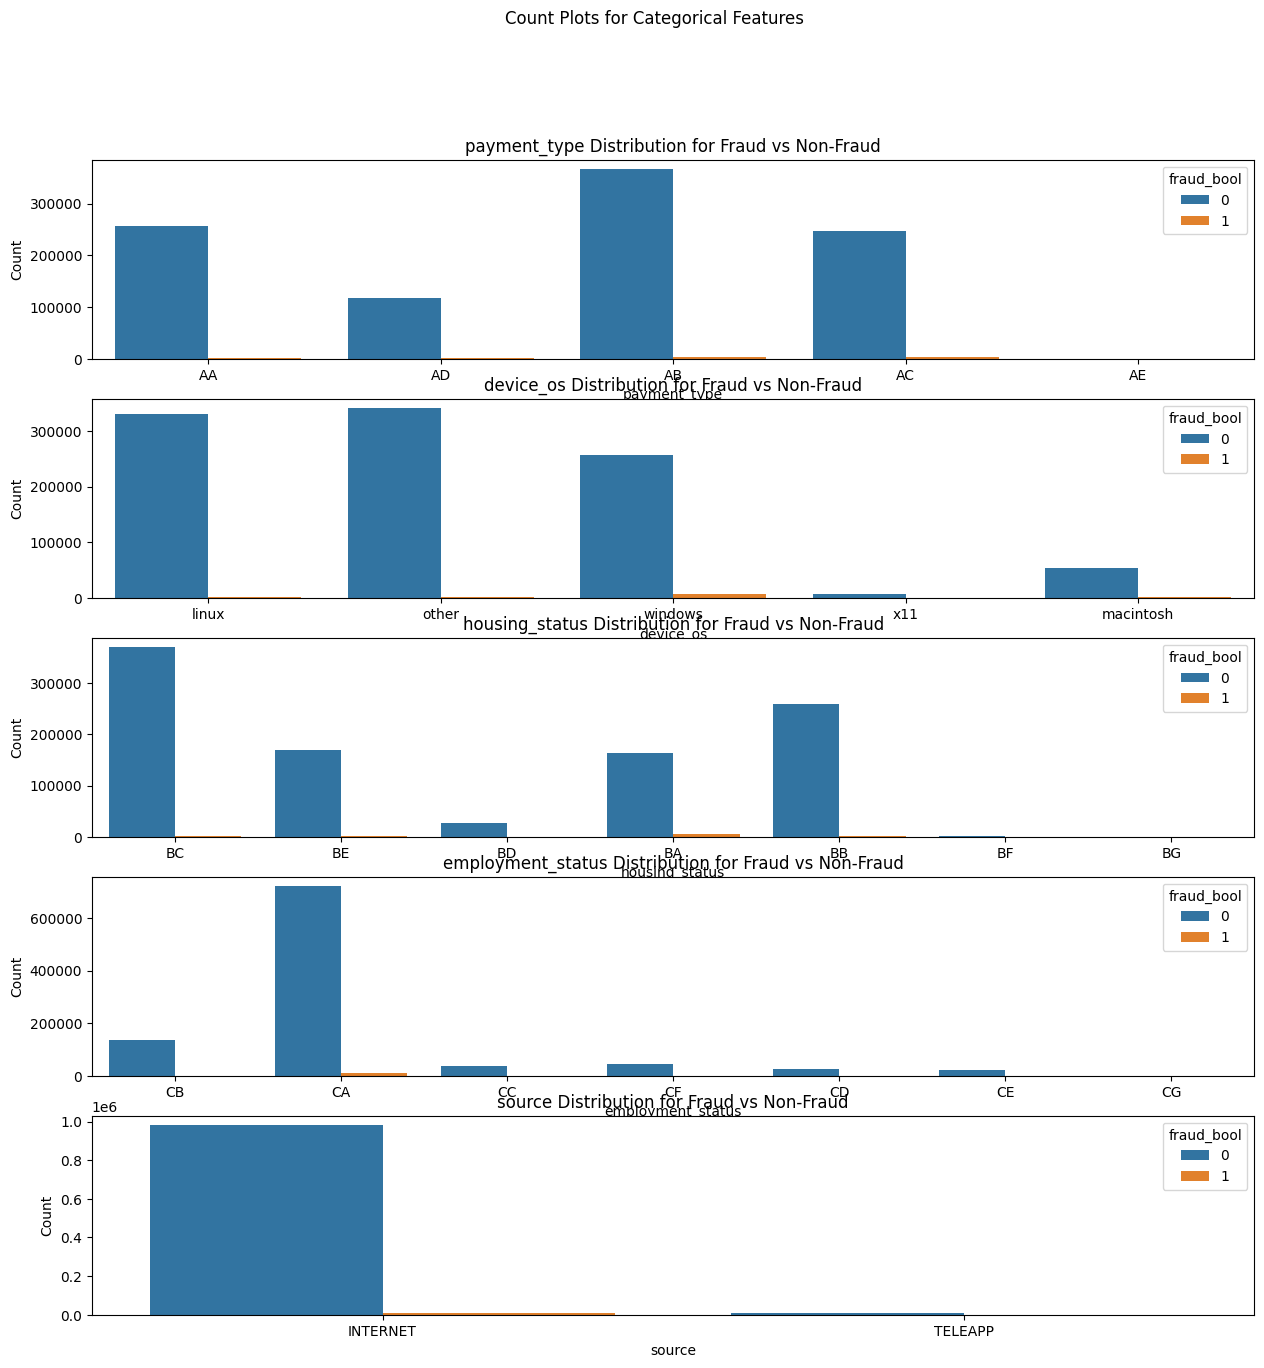

In [14]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(15,15))
fig.suptitle("Count Plots for Categorical Features")
for i, feature in enumerate(categorical):
    ax = axes[i]
    sns.countplot(data=df, x=feature, hue="fraud_bool", ax=ax)
    ax.set_ylabel("Count")
    ax.set_title(f"{feature} Distribution for Fraud vs Non-Fraud")
plt.show()

In [15]:
final_df = df.copy()

In [ ]:
final_df = pd.DataFrame(pd.get_dummies(final_df, prefix=categorical))

In [ ]:
print(final_df.shape)

In [ ]:
X = final_df.drop(['fraud_bool'], axis=1)
y = final_df['fraud_bool']

In [ ]:
Scaler = RobustScaler()
preprocessor = ColumnTransformer(
    [("scaled", Scaler, numerical)],  
    remainder="passthrough"  
)
X_scaled = preprocessor.fit_transform(X)

In [ ]:
feature_names = preprocessor.get_feature_names_out()

# Remove 'remainder__' from the feature names
feature_names = [feature.replace('remainder__', '') for feature in feature_names]

# Print the pre-processed feature names
print(feature_names)

In [24]:
def detect_outliers(data, features):
    Q1 = data[features].quantile(0.25)
    Q3 = data[features].quantile(0.75)
    IQR = Q3-Q1
    outliers = (((data[features] < (Q1-1.5*IQR)) | (data[features] > (Q3+1.5*IQR))).sum()/len(data))*100
    return outliers.sort_values(ascending=False)
df_fraud = df[df["fraud_bool"] == True]
df_non_fraud = df[df["fraud_bool"] == False]

In [27]:
fraud = detect_outliers(df_fraud, numerical)
nfraud = detect_outliers(df_non_fraud, numerical)

In [30]:
for feature in numerical:
    print(f"{feature}-> Fraud: {fraud[feature]}, Non-Fraud: {nfraud[feature]}")

name_email_similarity-> Fraud: 0.0, Non-Fraud: 0.0
prev_address_months_count-> Fraud: 8.114969625532687, Non-Fraud: 14.162397077366274
current_address_months_count-> Fraud: 4.306827454891649, Non-Fraud: 4.18758487357061
days_since_request-> Fraud: 11.243086408559252, Non-Fraud: 9.46306817894559
intended_balcon_amount-> Fraud: 11.515096563605042, Non-Fraud: 21.5246958707586
zip_count_4w-> Fraud: 4.624172635778402, Non-Fraud: 6.0036138572314055
velocity_6h-> Fraud: 1.0517725995103817, Non-Fraud: 0.8991163542712576
velocity_24h-> Fraud: 0.2176081240366307, Non-Fraud: 0.29040285306647007
velocity_4w-> Fraud: 0.0, Non-Fraud: 0.0
bank_branch_count_8w-> Fraud: 14.470940248435943, Non-Fraud: 17.57382167930101
date_of_birth_distinct_emails_4w-> Fraud: 1.985674131834255, Non-Fraud: 0.9782895555076945
credit_risk_score-> Fraud: 0.03626802067277178, Non-Fraud: 0.9038687686494346
bank_months_count-> Fraud: 0.0, Non-Fraud: 0.0
proposed_credit_limit-> Fraud: 0.0, Non-Fraud: 23.928001933322616
session

In [33]:
len(df[df['prev_address_months_count'] == -1])/len(df)

0.71292